# Importar Librerias

In [1]:
import numpy as np #Trabajar con matrices
from keras import layers, models #Importamos de keras capas y modelos
from keras.utils import to_categorical #Hacer one-hot ecoding a variables Y o destino
from keras.datasets import mnist #Dataset de entrenamiento
import matplotlib.pyplot as plt #Visualizar datos

# Importar datos

In [2]:
#IMPORTAR DATOS
(train_data, train_labels) , (test_data, test_labels) = mnist.load_data()
#datos que tenemos y de donde vienen

In [3]:
train_data.shape
#saber que forma tiene las imagenes
#(ejemplos, long, long)

(60000, 28, 28)

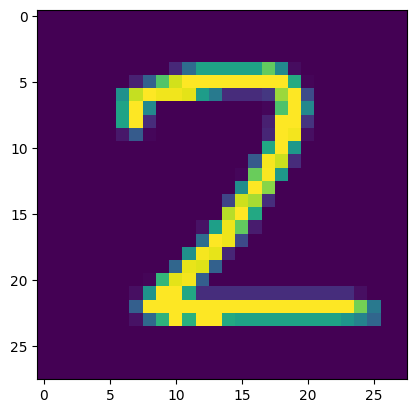

In [4]:
plt.imshow(train_data[5400])
#llamamos un dato y lo graficamos

In [5]:
train_labels[5400]
#llamar etiqueta de datos graficados

2

# Arquitectura de la red neuronal

In [6]:
model = models.Sequential() 
#creamos el modelo
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,))) 
#se asignamos capas(512),la funcion de activaciom(relu), froma de recepcion de datos(28*28)
model.add(layers.Dense(10,activation='softmax'))
#creamos otras capas con el numero de respuestas posibles(10) y la funcion de acticacion(softmax)


In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#compilamos red, con optimizador funcion de perdida y metrica de exito

In [8]:
model.summary()
#ver la arquitectura

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Procesamiento de datos

In [9]:
#arreglo de datos (0 a 1)
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255
#a los datos los cambiamos a dos dimenciones
#que sean de tipo decimal 
#los dividimos en 255 que es el valor maximo de pixeles para tener resultado de 0 a 1

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255
#lo mismo que antes pero para el test_data

In [10]:
#Arreglo de etiquetas (1 a lebel correcto, al resto 0)
y_train = to_categorical(train_labels)
#Hacer one-hot ecoding a labels de entretaniemto
y_test = to_categorical(test_labels)
#Hacer one-hot ecoding a label de testeo

In [11]:
train_labels[0]

5

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Entrenamiento de modelo

In [13]:
model.fit(x_train, y_train, epochs=5, batch_size=128)
#al modelo lo entrenamos con datos y etiquetas rpocesadas, interando 5 veces, con lotes de 128 unidades

Epoch 1/5
469/469 [==============================] - 6s 5ms/step - loss: 0.2729 - accuracy: 0.9204
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1092 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0516 - accuracy: 0.9843
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0385 - accuracy: 0.9888


# Probando modelo

Viendo comportamiento con data test de manera Intuitiva.

In [ ]:
# Predicción del modelo para una imagen de test aleatoria
rand_index = np.random.randint(len(x_test)) #Genera un número aleatorio dentro del rango de índices del conjunto de prueba
test_image = x_test[rand_index].reshape(28, 28) #Llamamos imagen correpondiente al indice anterior y adecuamos el tamaño, para precentar imagen
test_label = np.argmax(y_test[rand_index]) #obtenemos la etiqueta de la imagen correspondiente al indice, para precentar etiqueta
prediction = model.predict(np.array([x_test[rand_index]])) #hacemos la prediccion usando el modelo y mando a la imagen
predicted_label = np.argmax(prediction) #de las predicciones toma la de mayor valor y nos da la etiqueta, para precentar prediccion

# Mostrar la imagen, la etiqueta real y la predicción del modelo
plt.imshow(test_image, cmap='gray')
plt.title(f'Etiqueta real: {test_label}, Predicción del modelo: {predicted_label}')
plt.show()

Subiendo Inmagenes

In [ ]:
from PIL import Image

# Cargar la imagen desde tu máquina
image = Image.open("onem.png")

# Convertir la imagen a un arreglo de NumPy y redimensionarla a 28x28 píxeles
image_array = np.array(image.resize((28, 28)).convert('L'))

In [ ]:
# Convertir la imagen a un arreglo de una dimensión y normalizar los valores a [0, 1]
image_array = image_array.reshape(1, 28*28) / 255

In [ ]:
# Hacer una predicción con el modelo
prediction = model.predict(image_array)

# Obtener la etiqueta predicha
predicted_label = np.argmax(prediction)

In [ ]:
# Mostrar la imagen
plt.imshow(image_array.reshape(28, 28), cmap='gray')
plt.title(f'Predicción: {predicted_label}')
plt.show()

#Evaluacion del modelo

Evaluacion del modelo con data test

In [ ]:
# Evaluación del modelo con los datos de test
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Pérdida :', test_loss)
print('Exactitud :', test_acc)


Motramos como a aprendiendo

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 9.1905e-04 - accuracy: 0.9999 - val_loss: 0.0667 - val_accuracy: 0.9838
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 6.3096e-04 - accuracy: 1.0000 - val_loss: 0.0683 - val_accuracy: 0.9833
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 4.8674e-04 - accuracy: 1.0000 - val_loss: 0.0683 - val_accuracy: 0.9834
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 3.8065e-04 - accuracy: 1.0000 - val_loss: 0.0698 - val_accuracy: 0.9835
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 3.3613e-04 - accuracy: 1.0000 - val_loss: 0.0691 - val_accuracy: 0.9838


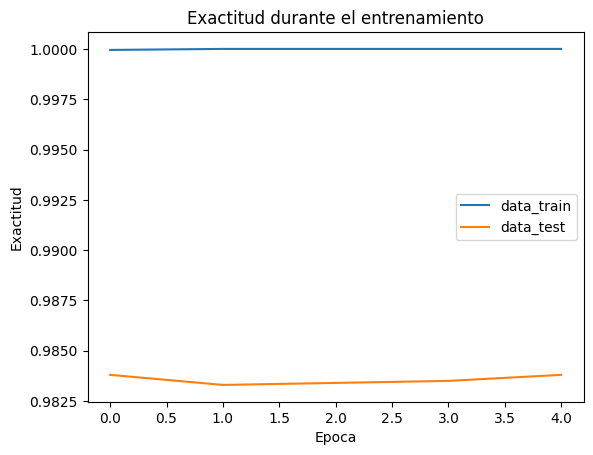

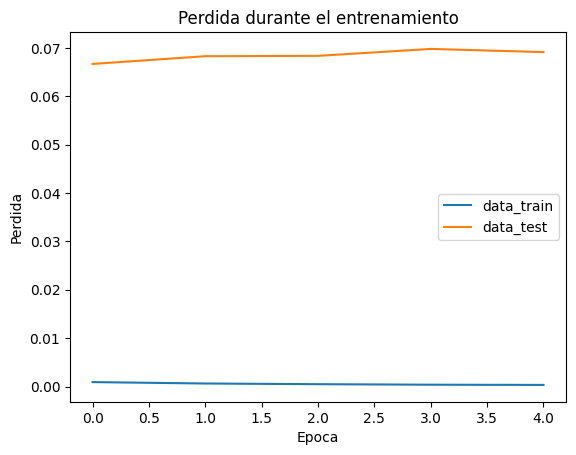

In [55]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))
# Entrenamiento del modelo y validación en datos de prueba

# Gráfica de precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='data_train')
plt.plot(history.history['val_accuracy'], label='data_test')
plt.title('Exactitud durante el entrenamiento')
plt.xlabel('Epoca')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

# Gráfica de pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='data_train')
plt.plot(history.history['val_loss'], label='data_test')
plt.title('Perdida durante el entrenamiento')
plt.xlabel('Epoca')
plt.ylabel('Perdida')
plt.legend()
plt.show()

# Extra

Guardar modelo, cargar imagenes y dar las 3 mejores opciones

In [28]:
#guaedar modelo
model.save('modelo_mnist.h5')

Saving four.png to four (3).png
1/1 [==============================] - 0s 43ms/step


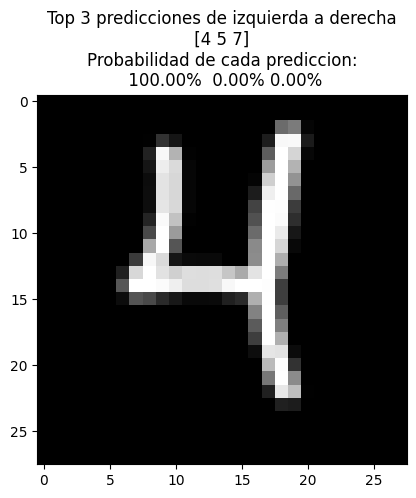

In [57]:
from google.colab import files
from PIL import Image
import numpy as np
from keras.models import load_model

# Cargar el modelo previamente entrenado
model = load_model('modelo_mnist.h5')

# Cargar la imagen subida desde el ordenador
uploaded = files.upload()

# Leer la imagen en memoria y procesarla para la predicción
img = Image.open(list(uploaded.keys())[0]).convert('L')
img = img.resize((28, 28))
x = np.array(img)
x = x.reshape(1, 28 * 28)
x = x.astype('float32') / 255

# Hacer la predicción con el modelo cargado
pred = model.predict(x)
labels = np.argsort(pred)[0][-3:][::-1] # Obtener los índices de los 3 valores más altos
probs = np.sort(pred)[0][-3:][::-1] # Obtener las probabilidades de los 3 valores más altos

# Mostrar la imagen subida y la predicción del modelo
plt.imshow(img, cmap='gray')
plt.title(f'Top 3 predicciones de izquierda a derecha\n {labels}'
          f' \nProbabilidad de cada prediccion:\n {probs[0]*100:.2f}%  {probs[1]*100:.2f}% {probs[2]*100:.2f}%')
plt.show()
